<a href="https://colab.research.google.com/github/HudaZainElAbden/Athletic-Community-Flutter/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading Audience Dataset**
Statistics and info
- Total number of photos: 26,580
- Total number of subjects: 2,284
- Number of age groups / labels: 8 (0-2, 4-6, 8-13, 15-20, 25-32, 38-43, 48-53, 60-)
- Gender labels: Yes
- In the wild: Yes
- Subject labels: Yes

In [ ]:
!pip3 install deeplake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.1/427.1 KB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 KB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 17.0 MB/s eta 0:00:00
  Created wheel for deeplake: filename=deeplake-3.2.4-py3-none-any.whl size=521757 sha256=13782d319cef6a046005d7121563f023358e58793a61ec

In [ ]:
import deeplake

Data Fields
- images: tensor containing the image
- ages: tensor containing ages (label) of an corresponding image
- gender: tensor containing gender of each image
- x: part of bounding box of the face in the original Flickr image
- y: part of bounding box of the face in the original Flickr image
- dx: part of bounding box of the face in the original Flickr image
- dy: part of bounding box of the face in the original Flickr image
- tilt_ang: pose of the face in the original Flickr image
- fiducial_yaw_angle: pose of the face in the original Flickr image
- fiducial_score: score of the landmark detector

In [ ]:
audience_dataset_path = 'hub://activeloop/adience'
ds = deeplake.load(audience_dataset_path) # Returns a Deep Lake Dataset but does not download data locally

hub://activeloop/adience loaded successfully.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/adience


In [ ]:
ds.summary()

Dataset(path='hub://activeloop/adience', read_only=True, tensors=['ages', 'dx', 'dy', 'fiducial_score', 'fiducial_yaw_angle', 'genders', 'images', 'tilt_ang', 'x', 'y'])

       tensor           htype               shape              dtype  compression
      -------          -------             -------            -------  ------- 
        ages         class_label          (19370, 1)          uint32    None   
         dx             text              (19370, 1)            str     None   
         dy             text              (19370, 1)            str     None   
   fiducial_score       text              (19370, 1)            str     None   
 fiducial_yaw_angle     text              (19370, 1)            str     None   
      genders        class_label          (19370, 1)          uint32    None   
       images           image     (19370, 80:932, 80:800, 3)   uint8    jpeg   
      tilt_ang          text              (19370, 1)            str     None   
         x              tex

In [ ]:
ds.visualize()

HINT: Please forward the port - 50493 to your local machine, if you are running on the cloud.
 * Serving Flask app "dataset_visualizer" (lazy loading)
 * Environment: production


   Use a production WSGI server instead.
 * Debug mode: off


In [ ]:
print(ds.tensors.keys()) # dict_keys(['images', 'labels'])
print(ds.tensors['ages'].numpy().size) 

dict_keys(['ages', 'dx', 'dy', 'fiducial_score', 'fiducial_yaw_angle', 'genders', 'images', 'tilt_ang', 'x', 'y'])
19370


(19370, None, None, 3)


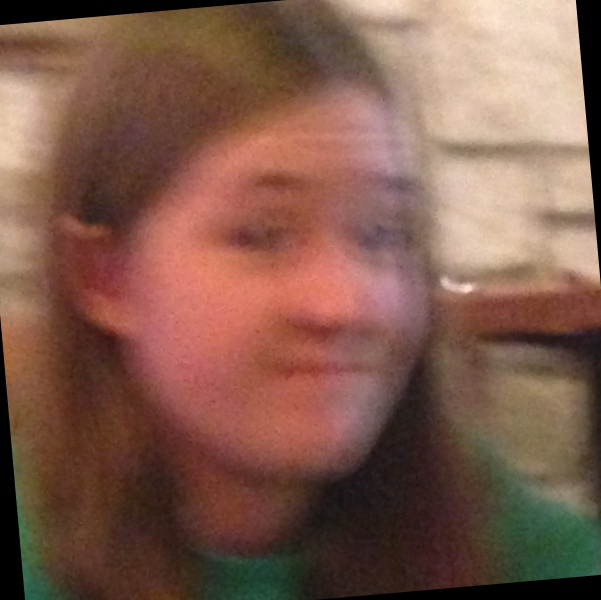

In [ ]:
from PIL import Image
print(ds.tensors['images'].shape)
Image.fromarray(ds.images[0].numpy()) # Get the first image in the dataset

In [127]:
print("Genders: ", ds.genders.info)
print("Ages: ", ds.ages.info) # Should have 8 (0-2, 4-6, 8-13, 15-20, 25-32, 38-43, 48-53, 60-) but it has 30 classes because of the missing ages between each 2 classes

Genders:  {'class_names': ['m', 'f', 'u', 'None']}
Ages:  {'class_names': ['(25, 32)', '(38, 43)', '(4, 6)', '(60, 100)', '(15, 20)', '(48, 53)', '(8, 12)', '(0, 2)', 'None', '(38, 48)', '35', '3', '55', '58', '22', '13', '45', '36', '23', '(38, 42)', '(8, 23)', '(27, 32)', '57', '56', '2', '29', '34', '42', '46', '32']}


# **Loading UTK Dataset**
Statistics and info
- consists of 20k+ face images in the wild (only single face in one image)
- provides the correspondingly aligned and cropped faces
- provides the corresponding landmarks (68 points)
- images are labelled by age, gender, and ethnicity

The labels of each face image is embedded in the file name, formated like [age]_[gender]_[race]_[date&time].jpg

- [age] is an integer from 0 to 116, indicating the age
- [gender] is either 0 (male) or 1 (female)
- [race] is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).
- [date&time] is in the format of yyyymmddHHMMSSFFF, showing the date and time an image was collected to UTKFace